# IT44 TP2: Interpolation polynomiale (Lucas Teixeira de Castro et Rayane ZEBIRI)
---

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/interpolation.png'  width="500px">
            
    </tr>
</table>

Dans ce second TP vous allez implémenter la plupart des procédures vues en cours et TD concernant le chapitre 1 sur l'interpolation polynomiale. Une fois implémenter des algorithmes permettant de construire le polynôme d'interpolation, vous ferez des tests et appliquerez vos résultats à des cas concret. 



## Evaluation de polynômes

Dans un premier temps on s'intéresse à l'évaluation des polynômes.
1. Ecrire une première fonction ```Eval(C,A,t)``` qui étant donnée un vecteur de $n+1$ valeurs $(a_0,\dots,a_{n})$, un vecteur de $n$ centres $(c_1,\dots, c_n)$ et une valeur $t\in \mathbb{R}$, calcule 
$$p(t)=a_0+a_1\times(t-c_1)+a_2(t-c_1)(t-c_2)+\dots a_n \prod_{i=1}^n (t-c_i)$$
Cette première fonction calculera cette évaluation de la manière la plus naïve possible en calculant:
$$p(t)=\sum_{i=0}^n a_i \prod_{j=1}^i (t-c_j).$$
(on adoptera la convention suivante: $\prod_{j=1}^0=1$.
2. Proposer une seconde fonction ```EvalH(C, A,t)``` qui utilise l'algorithme de Hörner vue en cours.
3. Mesurer et comparer les temps d'execution des deux algorithmes. Pour cela vous pourrez utiliser la séquence suivante et faire des tests sur des polynômes choisis aléatoirement:
```Python
import time
start_time = time.time()
main()
print("---%s seconds ---" % (time.time() - start_time))
```

In [81]:
import numpy as np
import time



def Eval(C,A,t):
    S=A[0]
    for i in range(0,len(C),1):
        P=1
        for j in range(0,i+1,1):
           P=P*(t-C[j])
        S = S + P*A[i+1]  
    return S   

def   EvalH(C,A,t):
    A_ = A
    for i in range(len(C)-1,-1,-1):         # indice C[i] décaller de 1 par rapport à A[i]
        A_[i] = A[i] +(t-C[i])*A_[i+1]
    return A[0]

#A=np.array([1,-2,3])
A = np.random.rand(2001)
#C=np.array([1,2])
C = np.random.rand(2000)
t=-1

start_time = time.time()
print(Eval(C,A,t))
print("---%s seconds ---" % (time.time() - start_time))


start_time = time.time()
print(EvalH(C,A,t))
print("---%s seconds ---" % (time.time() - start_time))



C:\Users\Lucas\AppData\Local\Temp\ipykernel_15104\604471409.py:11: RuntimeWarning: overflow encountered in double_scalars
  P=P*(t-C[j])
C:\Users\Lucas\AppData\Local\Temp\ipykernel_15104\604471409.py:12: RuntimeWarning: invalid value encountered in double_scalars
  S = S + P*A[i+1]


nan
---1.1489758491516113 seconds ---
inf
---0.0019996166229248047 seconds ---


C:\Users\Lucas\AppData\Local\Temp\ipykernel_15104\604471409.py:18: RuntimeWarning: overflow encountered in double_scalars
  A_[i] = A[i] +(t-C[i])*A_[i+1]


## Table des différences divisées

Ecrire un code ```Tab_diff_div(X,Y)``` qui étant donnée un vecteur représentant $n+1$ points de support $X=(x_0,\dots, x_n)$ et les valeurs correspondantes $(y_0,\dots y_n)$ calcule le vecteur des différences divisées correspondant.

In [2]:

X=np.array([-1,0,1])
Y=np.array([1,0,1])


def Tab_diff_div(X,Y):
    D = np.zeros(len(X))
    for i in range(0,len(X),1):
        D[i] = Y[i]

    for i in range(1,len(X),1):
        for j in range(len(X)-1,i-1,-1):
            D[j] = (D[j] - D[j-1])/(X[j] - X[j-i])
    return D


print(Tab_diff_div(X,Y))


[ 1. -1.  1.]


## Polynôme d'interpolation

1. Ecrire une fonction ```valf(X)``` qui pour un vecteur $X=(x_0,\dots,x_n)$ renvoie le vecteur $Y=(y_0,\dots,y_n)$ tel que $y_i=f(x_i)$ (on pourra choisir $f(x)=\exp(x)$).
2. Ecrire une fonction ``` Interpol(n,X,Y)``` qui, à partrir de l'entier naturel non nul $n$ et des données $X=(x_0,\dots,x_n)$ et $(y_0,\dots,y_n)$ représentant respectivement des points de support $x_i$ et leurs images $y_i=f(x_i)$ produit le polynôme d'interpolation $p$ de degré $n$ tel que $p(x_i)=y_i$, sous la forme $P=[P[0],P[1]]$ où $P[0]$ est le vecteur des centres de la base de Newton et $P[1]$ est le vecteur des coefficients correspondant.

In [3]:
import matplotlib.pyplot as plt

#X = np.array([0,1,2])
#Y = np.zeros(len(X))

X=np.array([-1,0,1])
Y=np.array([1,0,1])
n= len(X) - 1

def valf(X):
    Y = np.zeros(len(X))
    for i in range(0,len(X),1):
        Y[i] = np.exp(X[i])
    return Y

def Interpol(n,X,Y):

    C = np.zeros(len(X)-1)
    for i in range(len(X)-1):
        C[i] = X[i]             #vecteur des centres

    P = np.array( [C ,Tab_diff_div(X,Y) ] )
    #print(P[1][2])
    return P 

def representation_graphique(abscisse,fonction,P):
    p = np.zeros(100)   
    for i in range(len(p)):
        p[i] = Eval(P[0],P[1],abscisse[i])    # valeur des points du polynome d'interpolation p(x) sur [-1,1]

    plt.plot(abscisse,p,'bo',label="polynome d'interpolation")
    plt.plot(abscisse,fonction,'r+',label="exp(x)")  
    plt.legend(loc="upper left")  
    plt.title("interpolation de la fonction exp")   
    plt.show()

    return p

#print(Interpol(n,X,Y))
#t=1
#P = Interpol(n,X,Y)
#print(Eval(P[0],P[1],t))   

        



## Applications

1. Utiliser les codes ci-dessus pour construire $p_{8,1}$ le polynôme d'interpolation de la fonction $\exp$ sur le support $X1$ équiréparti tel que $x_0=-1, x_1=-\frac{3}{4},\dots,x_8=1$.
2. Utiliser les codes ci-dessus pour constuire $p_{8,2}$, le polynôme d'interpolation de la fonction $\exp$ sur le support $X2$ définit par les huits points de Tchebyschev:
$$\forall j\in \{0,\dots,8\}, X2[j]=\cos(\dfrac{(2j+1)\pi}{18})$$
3. Visualiser graphiquement l'erreur commise en valeur absolue lors de l'approximation de la fonction $\exp$ par $p_{8,1}$ et $p_{8,2}$.

In [4]:
x = np.linspace(-1,1,100)
exp_x = valf(x)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_15104\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


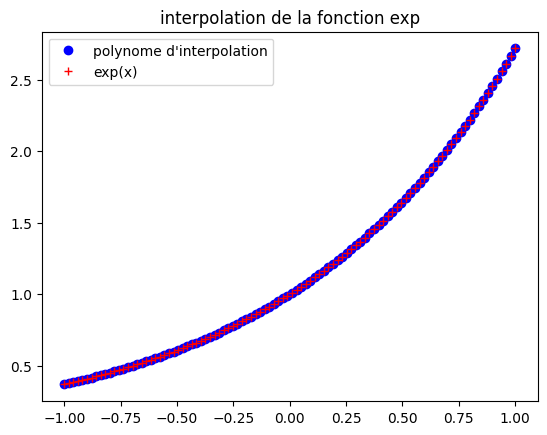

In [5]:
# 1)

X1=np.linspace(-1,1,9)   #[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
Y1=valf(X1)               # [0.36787944 0.47236655 0.60653066 0.77880078 1. 1.28402542 1.64872127 2.11700002 2.71828183]

P1 = Interpol(len(X1)-1,X1,Y1)
p1 = representation_graphique(x,exp_x,P1)

#j=2
#print(np.abs(p1[j]-exp_x[j]))


C:\Users\Lucas\AppData\Local\Temp\ipykernel_15104\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


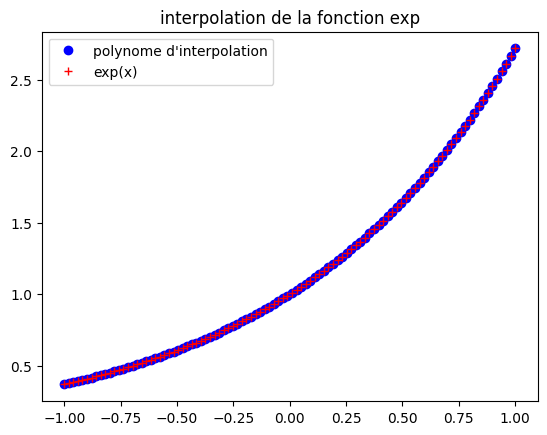

In [6]:
# 2)

X2 = np.zeros(9)
for j in range(0,9,1):
    X2[j] = np.cos((((2*j)+1)*np.pi)/18)
Y2=valf(X2)

P2 = Interpol(len(X2)-1,X2,Y2)
p2 = representation_graphique(x,exp_x,P2)

#j=6
#print(np.abs(p2[j]-exp_x[j]))

C:\Users\Lucas\AppData\Local\Temp\ipykernel_15104\3086716949.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(abscisse,erreur_p81,'bo',color='red',label="erreur en valeur absolue pour p_81")


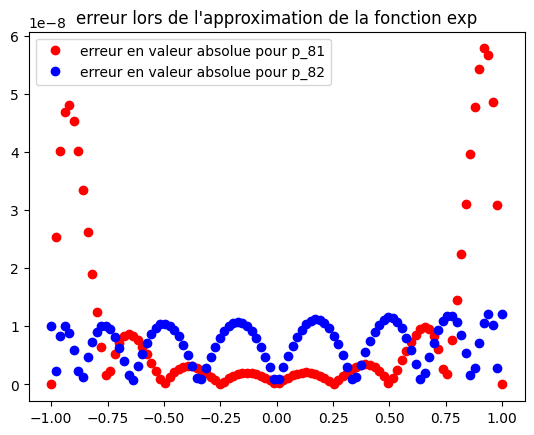

In [7]:
# 3)

erreur_p81 = np.zeros(100)
erreur_p82 = np.zeros(100)

def erreur(abscisse,erreur_p81,erreur_p82,fonction,polynome_interpolation_p1,polynome_interpolation_p2):
    for i in range(0,100,1):
        erreur_p81[i] = np.abs(fonction[i] - polynome_interpolation_p1[i])
    plt.plot(abscisse,erreur_p81,'bo',color='red',label="erreur en valeur absolue pour p_81")
    for i in range(0,100,1):
        erreur_p82[i] = np.abs(fonction[i] - polynome_interpolation_p2[i])
    plt.plot(abscisse,erreur_p82,'bo',label="erreur en valeur absolue pour p_82")
    plt.legend(loc="upper left")  
    plt.title("erreur lors de l'approximation de la fonction exp")  

    plt.show()


erreur(x,erreur_p81,erreur_p82,exp_x,p1,p2)

        

## Généralisation

Généraliser ce qui précède pour construire le polynôme d'interpolation d'une fonction $f$ pour un support quelconque (i.e. en autorisant la répétition des points). On supposera que l'on sait dériver $f$ et on pourra construire une fonction ```valdf(\tilde{X})```qui retourne le vecteur des valeurs de la dérivée de $f$ pour un support extrait de $X$.

0


C:\Users\Lucas\AppData\Local\Temp\ipykernel_15104\3419973044.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div_generaliser(X,Y_extrait,Y) ] )


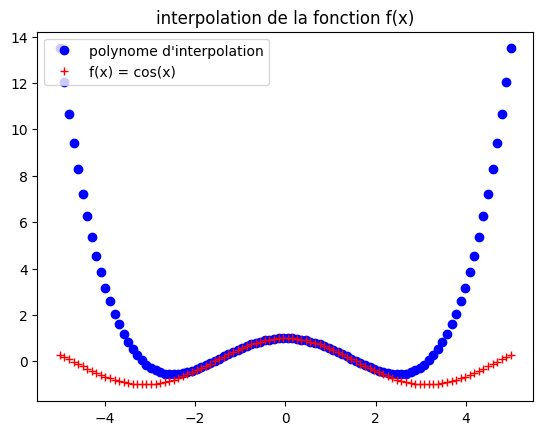

In [91]:
def Tab_diff_div_generaliser(X,Y_extrait,Y):
    D = np.zeros(len(X))
    for i in range(0,len(X),1):
        D[i] = Y[i]

    k = len(X_extrait) - 1  #compteur pour les indices de la liste X_extrait , les points de support redondant doivent se suivre dans l'ordre
    for i in range(1,len(X),1):
        for j in range(len(X)-1,i-1,-1):
            if(X[j] != X[j-i]):
                D[j] = (D[j] - D[j-1])/(X[j] - X[j-i])
            elif(i == 1 and X[j] == X[j-i]):
                print(X[j-1])
                #D[j] = valdf(X[j-1],fx)
                D[j] = Y_extrait[k]
                k=k-1
    return D

def Interpol_generaliser(n,X,Y_extrait,Y):

    C = np.zeros(len(X)-1)
    for i in range(len(X)-1):
        C[i] = X[i]             #vecteur des centres

    P = np.array( [C ,Tab_diff_div_generaliser(X,Y_extrait,Y) ] )
    #print(P[1][2])
    return P 

def fonction(x):   # fonction que l'on souhaite interpoler
    return np.cos(x)
    #return x**2

def point_de_fx(intervalle,fonction):   # renvoie le vecteur des points de la fonction que l'on souhaite interpoler afin de la tracer
    fx=np.zeros(len(intervalle))
    for i in range(len(intervalle)):
        fx[i] = fonction(intervalle[i])
    return fx

def valdf(X_extrait,fx):        # renvoie le vecteur des valeurs de la dérivé première de la fontion f sur le support extrait des points redondant X_extrait = {x0,x0,...,xi,xi,...}
    Y_prime = np.zeros(len(X_extrait))
    h = 1e-5 # augmenter h pour une meilleur précision
    
    for i in range(len(Y_prime)):
        Y_prime[i] = (fx(X_extrait[i]+h)-fx(X_extrait[i]))/h
        #(fx(X[i]+h)-fx(X[i]-h))/(2*h)   # Symmetric derivative for better results

    return Y_prime

def repetetion_point_de_support_X(X):       #renvoie la liste des points redondant , si X =[0,0,0,1,1,5] => renvoie [0, 0, 1]
    X_extrait = []
    for i in range(len(X)):
        if(X.count(X[i])>1):
            if(X[i] not in X_extrait):
                for j in range(X.count(X[i])-1):
                    X_extrait.append(X[i])  
    return X_extrait

def valf_(X,fx):           # retourne les points images p(xi) = f(xi)
    Y = np.zeros(len(X))
    for i in range(0,len(X),1):
        Y[i] = fx(X[i])

    return Y

X=[-1,-0.5,0,0,0.5,1]      # les points identiques doivent être répeter à la suite les un des autres
X_extrait = repetetion_point_de_support_X(X)
Y = valf_(X,fonction)
Y_extrait = valdf(X_extrait,fonction)
#print(Y)
#print(f"Y_extrait{Y_extrait}")

x = np.linspace(-5,5,100)           # intervalle des abscisse x
fx = point_de_fx(x,fonction)

P = Interpol_generaliser(len(X)-1,X,X_extrait,Y)

p = np.zeros(100)   
for i in range(len(p)):
    p[i] = Eval(P[0],P[1],x[i])    # valeur des points du polynome d'interpolation p(x) sur l'intervalle x

plt.plot(x,p,'bo',label="polynome d'interpolation")
plt.plot(x,fx,'r+',label="f(x) = cos(x)")  
plt.legend(loc="upper left")  
plt.title("interpolation de la fonction f(x)")   
plt.show()



## Phénomène de Runge

On considère la fonction $f(x)=\dfrac{1}{1+25x^2}$ pour $x\in [-1,1]$ et on considère les supports $X_n=\{x_0,\dots,x_n\}$ tels que $x_0=-1, x_n=1$ et $x_{i+1}=x_i+h$ avec $h=\frac{2}{n}$.

Tracer sur le même graphique la fonction $f$ et plusieurs polynôme d'intepolation $p_n$ pour différentes valeurs de $n$. Qu'observez-vous ?

OBSERVATION : On observe qu'augmenter le nombre de point de support réduit considérablement la précision du polynome d'interpolation lorsque le polynome est en dehors des points de support 

interpolation par le polynome p_5


C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


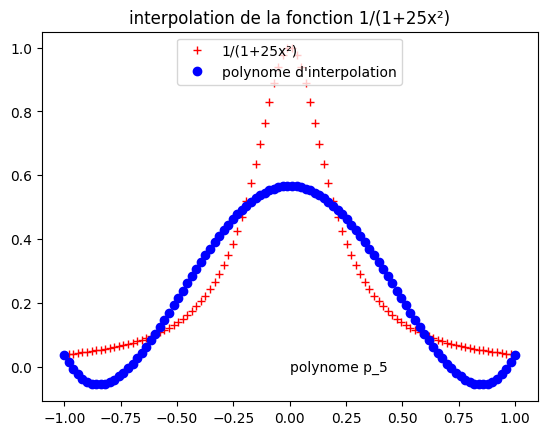

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_10


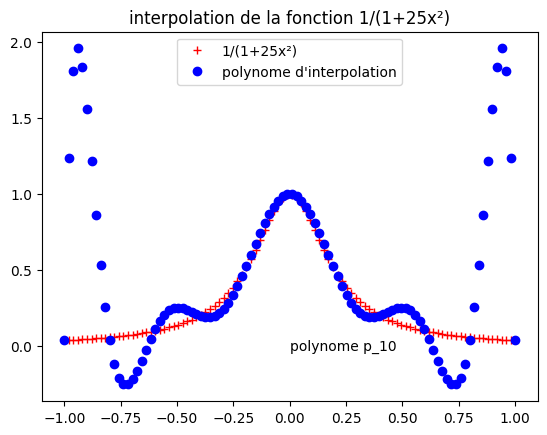

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_15


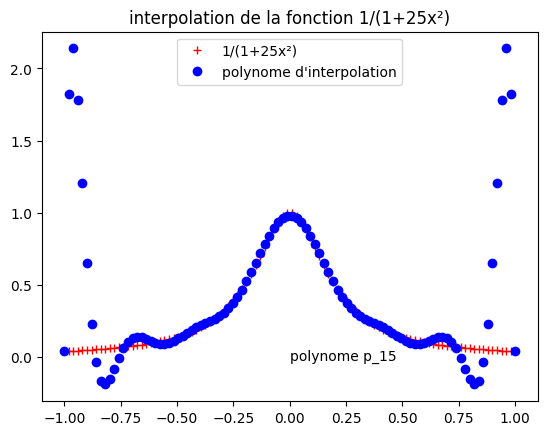

interpolation par le polynome p_20


C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


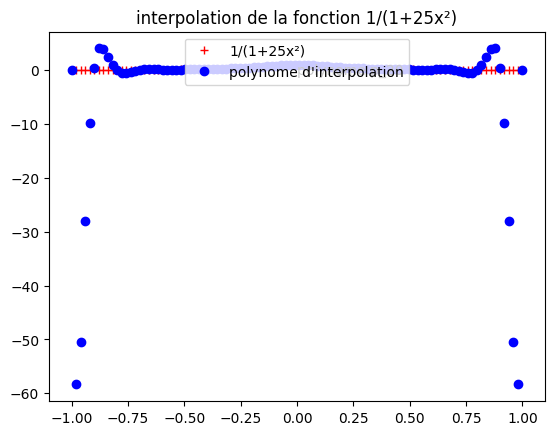

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_25


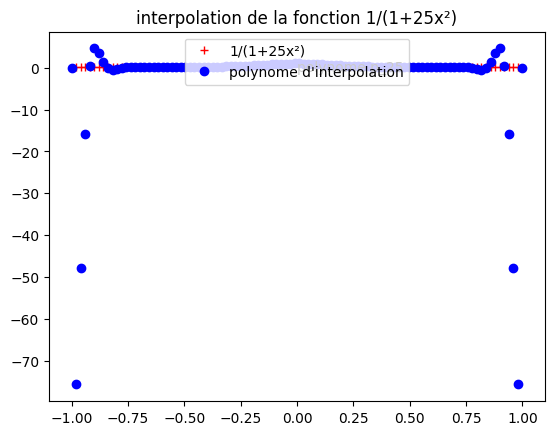

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_30


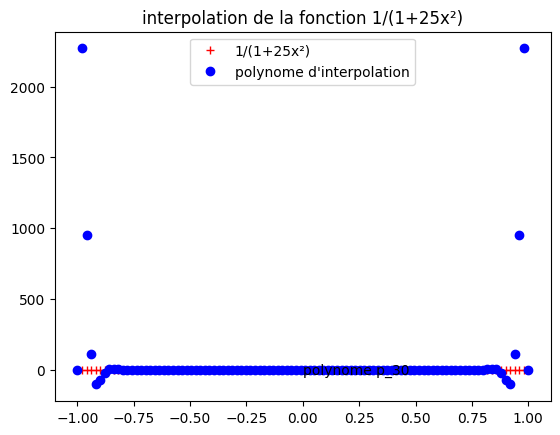

interpolation par le polynome p_35


C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


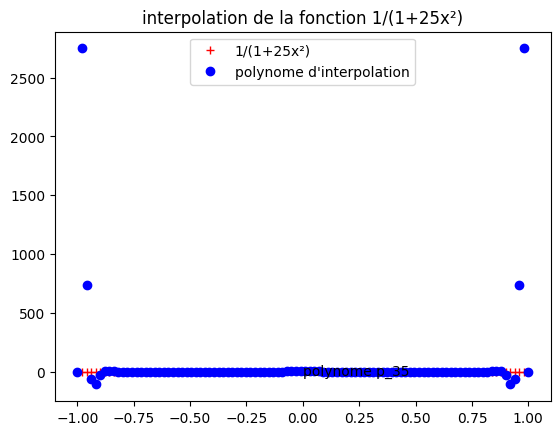

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_40


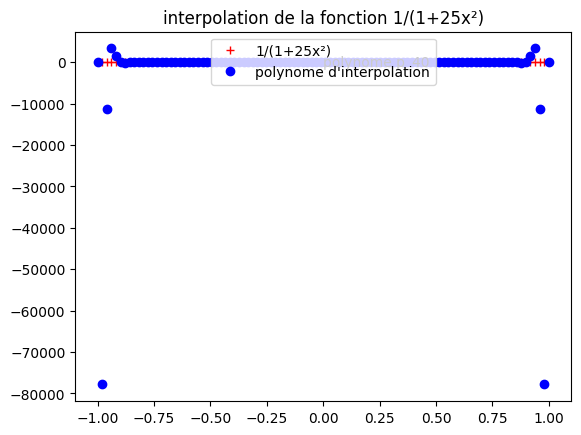

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_45


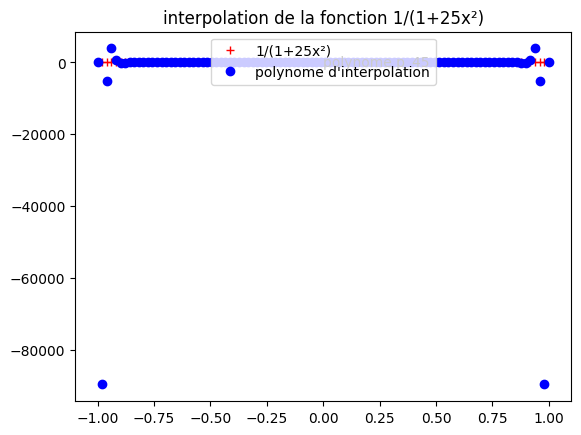

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_50


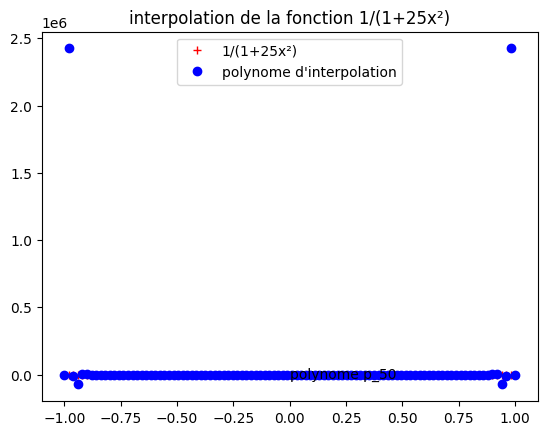

interpolation par le polynome p_55

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


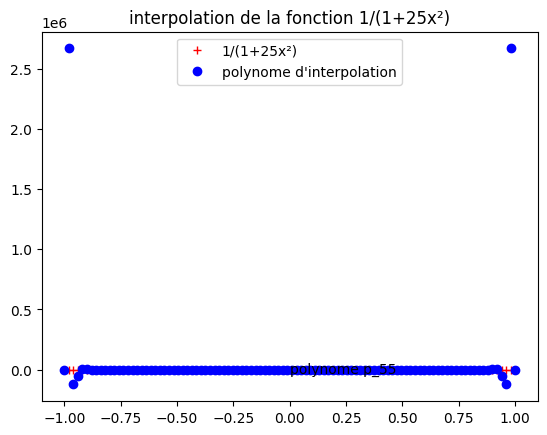

interpolation par le polynome p_60


C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


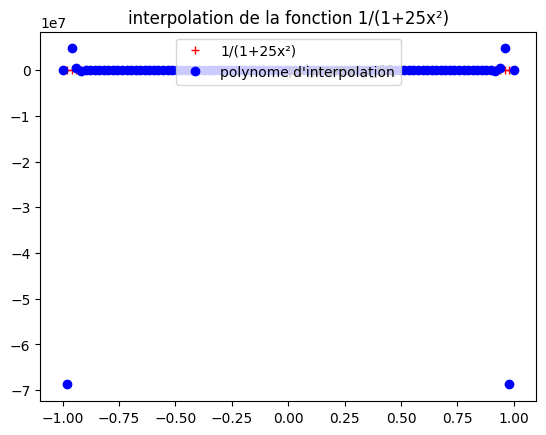

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_65


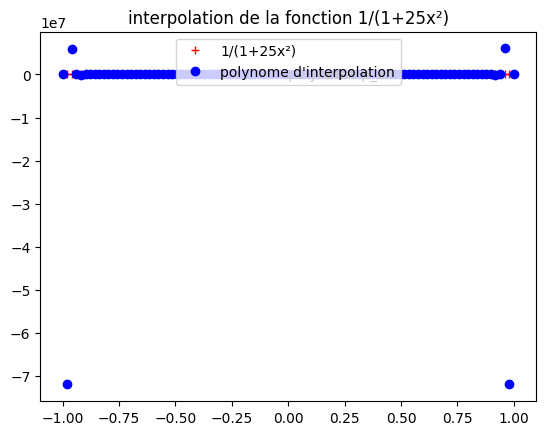

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_70


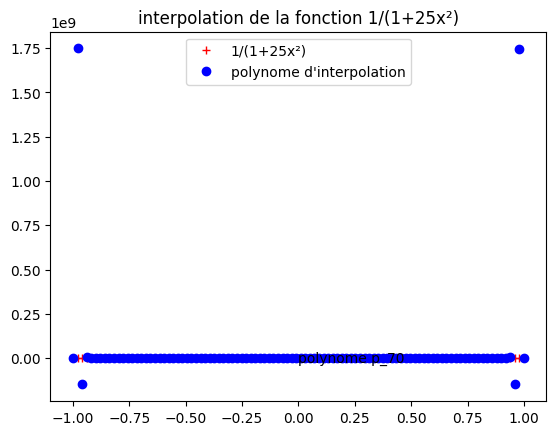

interpolation par le polynome p_75


C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


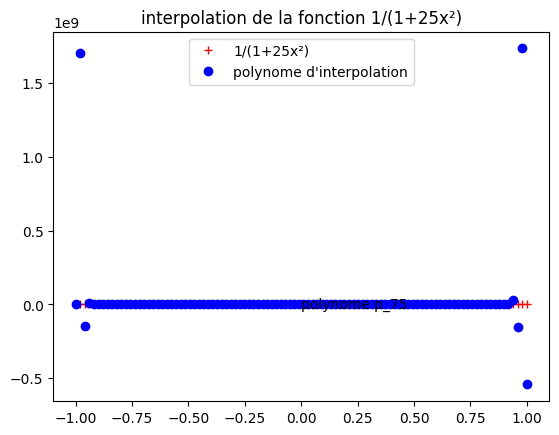

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_80


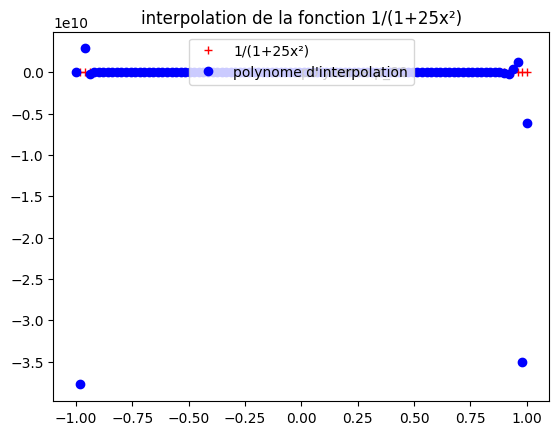

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_85


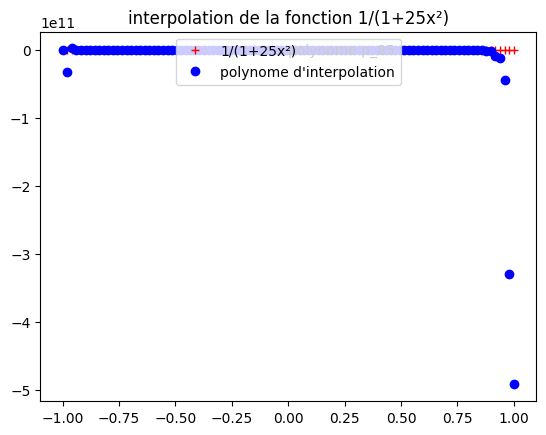

C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


interpolation par le polynome p_90


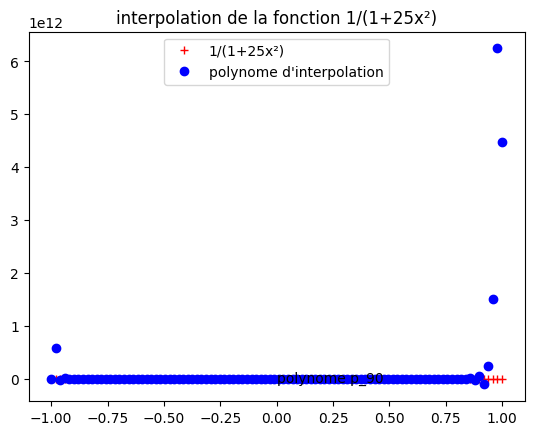

interpolation par le polynome p_95


C:\Users\Lucas\AppData\Local\Temp\ipykernel_8120\3718075177.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array( [C ,Tab_diff_div(X,Y) ] )


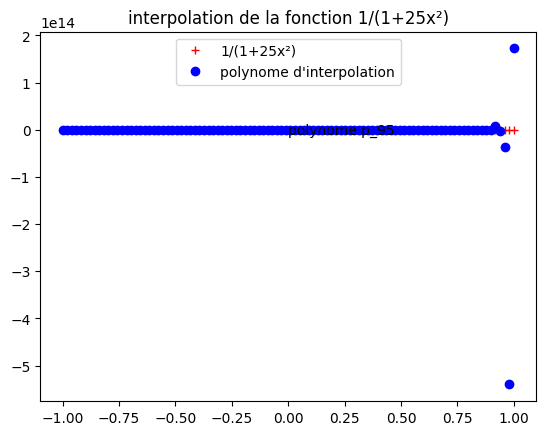

In [ ]:
def representation_graphique(abscisse,fonction,P,n):
    p = np.zeros(100)   
    for i in range(len(p)):
        p[i] = Eval(P[0],P[1],abscisse[i])    # valeur des points du polynome d'interpolation p(x) sur [-1,1]
    plt.plot(abscisse,fonction,'r+',label="1/(1+25x²)")  
    plt.plot(abscisse,p,'bo',label="polynome d'interpolation")
    print(f"interpolation par le polynome p_{n}")
    plt.text(0,0,f'polynome p_{n}',va="center")
    plt.legend(loc="upper center")  
    plt.title("interpolation de la fonction 1/(1+25x²)")   
    plt.show()

x = np.linspace(-1,1,100)
f_x = np.zeros(100)
for i in range(len(x)):     #construction des points de la fonction 1/(1+25x²) pour la tracer
    f_x[i] = 1/(1+25*x[i]**2)    

for k in range(5,100,5):
    n = k
    h = 2/n

    X=np.zeros(n+1) 
    X[0] = -1

    for i in range(0,n,1):  #construction des points de support
        X[i+1] = X[i] + h
    Y=np.zeros(n+1)
    for i in range(len(X)): # construction des points images yi = f(xi)
        Y[i] = 1/(1+25*X[i]**2)

    P = Interpol(len(X)-1,X,Y)
    representation_graphique(x,f_x,P,n)     # parametre n qui représente Xn , le nombre de point de support - 1
